In [7]:
#load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
import math
from sklearn.cluster import KMeans

In [8]:
#load the dataset. I want to load both original and cleaned datasets
dfmallcustomer= pd.read_csv("datasets/Mall_Customers.csv")
dfcleaned= pd.read_csv("datasets/dfmallcustomer.csv")

In [9]:
#select age, annual income, and spending scores
x = dfmallcustomer.iloc[:,2:]

In [10]:
x.shape

(200, 3)

In [11]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


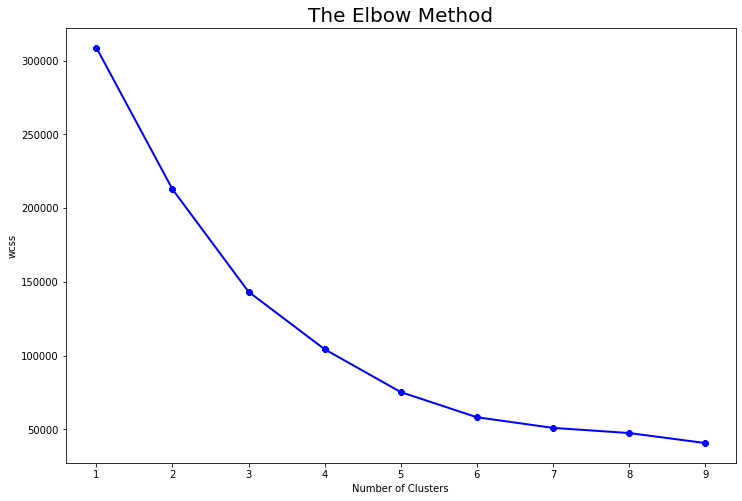

In [12]:
#elbow method. resources: https://medium.com/@ODSC/unsupervised-learning-evaluating-clusters-bd47eed175ce
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

wcss = [] #Within Cluster Sum of Squared Errors 
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, tol=0.0001, verbose=0, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,10), wcss, linewidth=2, color="blue", marker ="8")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.xticks(np.arange(1,10,1))
plt.show()

In [13]:
#It seems 5 cluster is the number of clusters I need to select. I am going to create k-means clustering with 5 clusters
#https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
from mpl_toolkits.mplot3d import Axes3D 

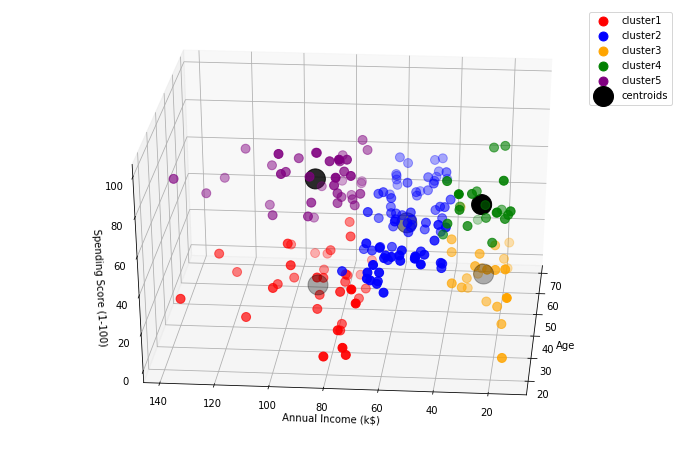

In [14]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(x)
dfmallcustomer["label"] = clusters
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 0], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 0], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 0], c='red', s=80, label='cluster1')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 1], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 1], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 1], c='blue', s=80, label='cluster2')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 2], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 2], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 2], c='orange', s=80, label='cluster3')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 3], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 3], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 3], c='green', s=80, label='cluster4')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 4], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 4], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 4], c='purple', s=80, label='cluster5')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s=400,c='black',label='centroids')


ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()


__INTERPRETATION__: __Cluster1 (red cluster):__ Generally people older than 40 years old with lower annual income and lower spending score.

__Cluster2 (blue cluster):__ Generally people between 20-50 years old with more than 80k annual income and moderate spending score.

__Cluster3 (orange cluster):__ These are the people who are spreaded in terms of age. It seems that their centroids are about 60 years old. But they have higher annual income (80k and more) but don't spend too much.

__Cluster4 (green cluster):__ These customers do not have either very high or low annual income. They are spreaded to all ages. They also do not have either very high or low spending scores.

__Cluster5 (purple cluster):__ These customers have the lowest population. They are younger with lower annual income. Their spending score is moderate. 

__CONCLUSION__

Young people spend more even when they have lower annual income. On the other hand, older people spend less even when their annual income is 80k and more. However, this analysis do not tell me a lot about the customers even though I can say that main marketing strategy should  focus on younger people. Adding what found in data storytelling, my main recomendation would be that marketing strategies should be designed around females who are 20-50 years old. There are some overlaps so that I will apply another clustering algorightm to check the number of clusters.



In [15]:
#I want to use hierarchical clustering. First I need to load required libraries dendogram and linkage
from scipy.cluster.hierarchy import dendrogram, linkage

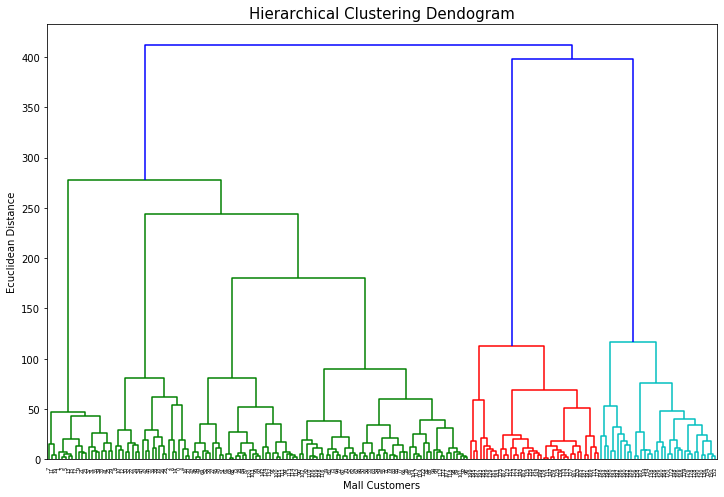

In [16]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
y = linkage(x, method='ward', metric='euclidean', optimal_ordering=False)
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(y)
plt.title('Hierarchical Clustering Dendogram', fontsize = 15)
plt.xlabel('Mall Customers')
plt.ylabel('Euclidean Distance')
plt.show()

__INTERPRETATION:__ This was what I have been suspected about. I think it could be possible to think 3 clusters rather than 5 cluster. As seen in the dendogram above, all green customers merge together at some points. So, I will create three clusters this time to see how it looks like. 

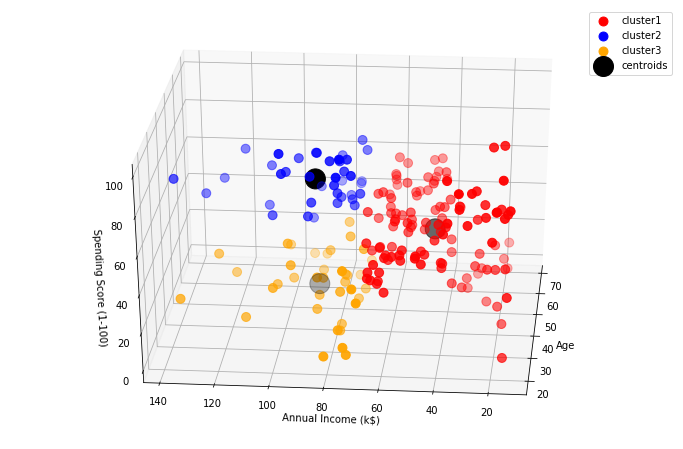

In [17]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(x)
dfmallcustomer["label"] = clusters
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 0], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 0], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 0], c='red', s=80, label='cluster1')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 1], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 1], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 1], c='blue', s=80, label='cluster2')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 2], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 2], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 2], c='orange', s=80, label='cluster3')
#ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 3], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 3], 
           #dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 3], c='green', s=80, label='cluster4')
#ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 4], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 4], 
           #dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 4], c='purple', s=80, label='cluster5')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s=400,c='black',label='centroids')


ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

__INTERPRETATION:__ Even though, some blue and orange ones overlap, three clusters are also as clear as 5 clusters model. Based on the plot above, I would say that the mall business owners should target the blue cluster who represent younger people with higher annual income. This is pretty similar to what I found with five clusters but more obvious than that.

In [18]:
print((dfmallcustomer.Age[dfmallcustomer.label == 0], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 0], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 0]))

(0      19
1      21
2      20
3      23
4      31
       ..
118    51
119    50
120    27
121    38
122    40
Name: Age, Length: 123, dtype: int64, 0      15
1      15
2      16
3      16
4      17
       ..
118    67
119    67
120    67
121    67
122    69
Name: Annual Income (k$), Length: 123, dtype: int64, 0      39
1      81
2       6
3      77
4      40
       ..
118    43
119    57
120    56
121    40
122    58
Name: Spending Score (1-100), Length: 123, dtype: int64)


Text(0.5, 1.0, 'Cluster 1')

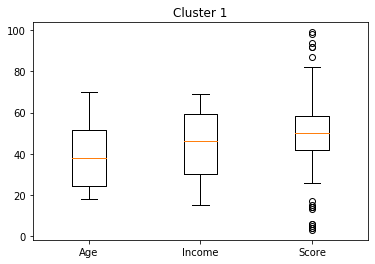

In [19]:
plt.boxplot((dfmallcustomer.Age[dfmallcustomer.label == 0], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 0], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 0]))
plt.xticks( [1, 2, 3], ['Age', 'Income', 'Score'])
plt.title('Cluster 1')

__INTERPRETATION__:This is the boxplot for the cluster 1. For this cluster, the ages range between 18 and 70 years old. The median and mean are very close to each other. So, the median age is about 40 years old. Also, the majority of customers spear between 30 and 50 years old. These customers have moderate income between about 20k and 70k. The majority of them earn about 30k and 60k per year. On the other hand, their spending scores are vary and there are many outliers in this group. However, the median and mean in this group are also identical and about 50.  

Text(0.5, 1.0, 'Cluster 2')

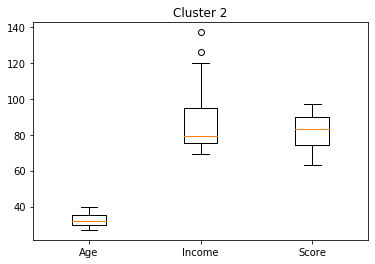

In [20]:
plt.boxplot((dfmallcustomer.Age[dfmallcustomer.label == 1], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 1], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 1]))
plt.xticks( [1, 2, 3], ['Age', 'Income', 'Score'])
plt.title('Cluster 2')

__INTERPRETATION:__   There are only two outliers in income group. This group's ages range between 20 and 40 while the majority is between 20 and 30 years old so that these group represents the younger people. They mostly have higher income of 70k and more. The median of income is about 80k and the majority of customers have a higher income than 80k. Also, their spending scores are higher compare to other groups and the median of the spending score is over 80. 

Text(0.5, 1.0, 'Cluster 3')

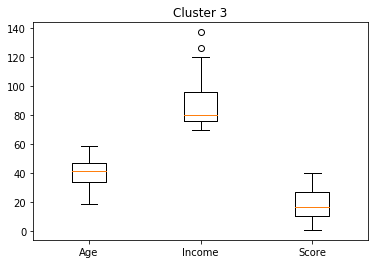

In [21]:
plt.boxplot((dfmallcustomer.Age[dfmallcustomer.label == 2], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 2], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 2]))
plt.xticks( [1, 2, 3], ['Age', 'Income', 'Score'])
plt.title('Cluster 3')

__INTERPRETATION:__ The customers in cluster 3 are between 20 and 60 years old and the median for the ages in this group is between 40 and 50 years old. In terms of income, they have 70k and more. There are only two outliers who earn more than 120k. On the other hand, the people in this cluster don't spend to muchy. The majority of the customers in this group has a spending score between 20-30.  

__CONCLUSION:__ Looking at the initial elbow method, I thought that 5 clusters should be the optimal number of the clusters. However, I still saw some overlap in some of the clusters. Applying a hierarchical clustering algorithm, I was able to better understand the number of the clusters. The hierarchical clustering dendogram showed me that 3 clusters could be a better choice. When I reapplied k-means clustering with 3 clusters, I got better results. However, interestingly, one of the clusters did not change at all. This cluster was the cluster 2 in the second algorithm while cluster 5 in the first algorithm. The number of data points didn't change at all. Finally, I explored each cluster separetly using box plots where the results showed that the second group of people (younger people with the ages of 20-40 years old, and with moderate to high annual income) could be the target customers for the mall business owners. In this clustering analysis, hierarchical clustering method was a better solution to find out the optimal number of clusters.